In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
simple_data=pd.read_csv('/content/House_Rent_Dataset.csv')

In [3]:
pd.options.display.float_format ='{:,.3f}'.format

In [ ]:
simple_data.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [ ]:
simple_data.shape

(4746, 12)

In [ ]:
simple_data.isnull().count()

Posted On            4746
BHK                  4746
Rent                 4746
Size                 4746
Floor                4746
Area Type            4746
Area Locality        4746
City                 4746
Furnishing Status    4746
Tenant Preferred     4746
Bathroom             4746
Point of Contact     4746
dtype: int64

In [4]:
simple_data=simple_data.rename(columns=lambda col:col.replace(" ","_"))

In [5]:
simple_data['Tenant_Preferred'].value_counts()

Bachelors/Family    3444
Bachelors            830
Family               472
Name: Tenant_Preferred, dtype: int64

In [ ]:
simple_data['Floor'].value_counts()

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 480, dtype: int64

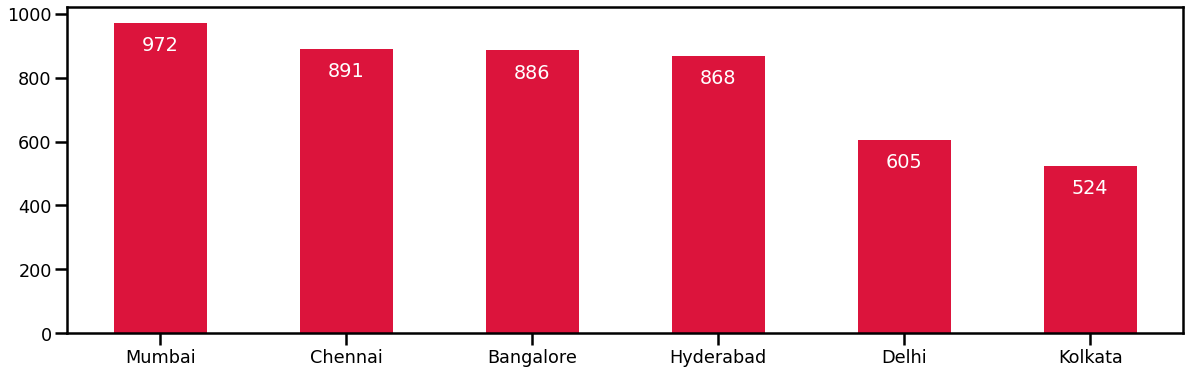

In [ ]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (20, 6))
ax = simple_data["City"].value_counts().plot(kind = 'bar',
                                         color = "crimson",
                                         rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 100),
                ha = 'center',
                va = 'bottom',
                color = 'white')

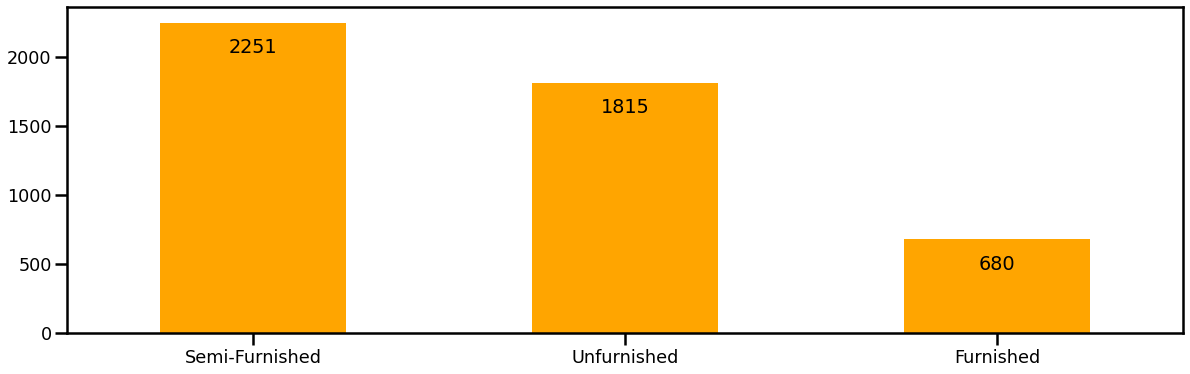

In [ ]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (20, 6))
ax = simple_data["Furnishing_Status"].value_counts().plot(kind = 'bar',
                                                      color = "Orange",
                                                      rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 250),
                ha = 'center',
                va = 'bottom',
                color = 'Black')

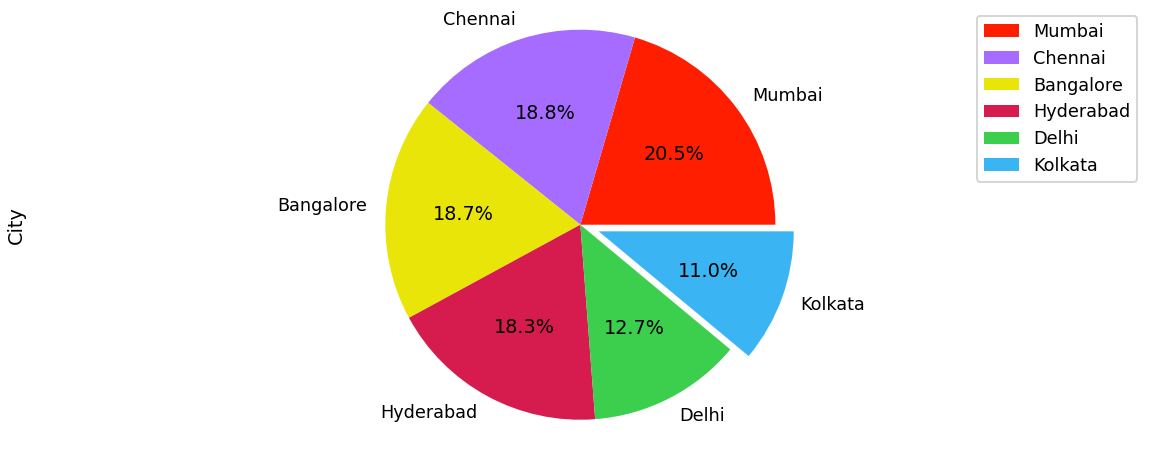

In [ ]:
plt.figure(figsize = (20, 8))
counts = simple_data["City"].value_counts()
explode = (0, 0, 0, 0, 0, 0.1)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E', '#3AB4F2']

counts.plot(kind = 'pie',
            colors = colors,
            explode = explode,
            autopct = '%1.1f%%')
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

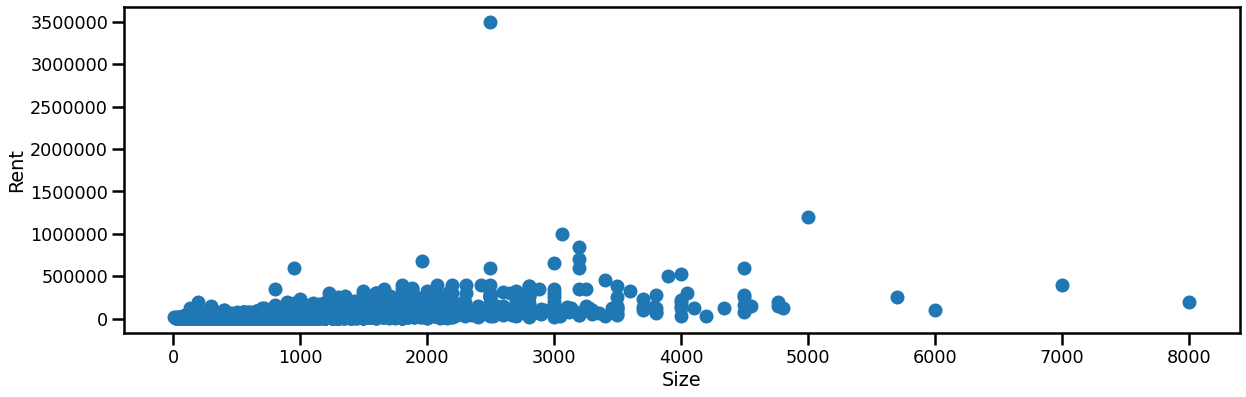

In [ ]:
plt.figure(figsize = (20, 6))
plt.ticklabel_format(style = 'plain')
plt.scatter(simple_data["Size"], simple_data["Rent"])
plt.xlabel("Size")
plt.ylabel("Rent");

In [6]:
simple_data.sort_values(by=['Rent'], inplace=True)
simple_data['Area_Type'] = simple_data['Area_Type'].replace('Carpet Area',1)
simple_data['Area_Type'] = simple_data['Area_Type'].replace('Super Area',2)
simple_data['Area_Type']=simple_data['Area_Type'].replace('Built Area',3)
simple_data['City'] = simple_data['City'].replace('Kolkata',1)
simple_data['City'] = simple_data['City'].replace('Delhi',2)
simple_data['City'] = simple_data['City'].replace('Mumbai',3)
simple_data['City'] = simple_data['City'].replace('Bangalore',4)
simple_data['City'] = simple_data['City'].replace('Hyderabad',5)
simple_data['City'] = simple_data['City'].replace('Chennai',6)

simple_data['Furnishing_Status'] = simple_data['Furnishing_Status'].replace('Unfurnished',1)
simple_data['Furnishing_Status'] = simple_data['Furnishing_Status'].replace('Semi-Furnished',2)
simple_data['Furnishing_Status'] = simple_data['Furnishing_Status'].replace('Furnished',3)

simple_data['Point_of_Contact'] = simple_data['Point_of_Contact'].replace('Contact Owner',1)
simple_data['Point_of_Contact'] = simple_data['Point_of_Contact'].replace('Contact Agent',2)
simple_data['Point_of_Contact'] = simple_data['Point_of_Contact'].replace('Contact Builder',3)
simple_data.drop(simple_data.columns[[0, 4, 6,9]], axis=1, inplace=True)
simple_data

,BHK,Rent,Size,Area_Type,City,Furnishing_Status,Bathroom,Point_of_Contact
4076,3,1200,2100,1,5,3,3,1
285,1,1500,200,2,1,2,1,1
471,1,1800,500,2,1,2,1,1
2475,2,2000,60,2,2,1,1,1
146,2,2200,550,2,1,3,1,1
...,...,...,...,...,...,...,...,...
1459,4,700000,3200,1,3,3,4,2
1329,4,850000,3200,1,3,3,4,2
827,4,1000000,3064,1,3,2,4,2
1001,4,1200000,5000,1,3,2,4,2


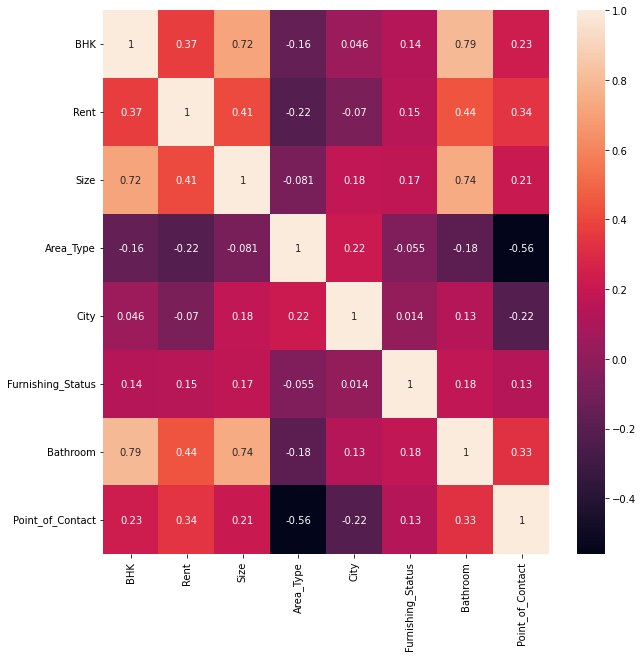

In [7]:
plt.figure(figsize=(10, 10))
sns.heatmap(simple_data.corr(),annot=True)

In [ ]:
simple_data.describe()

,BHK,Rent,Size,Area_Type,City,Furnishing_Status,Bathroom,Point_of_Contact
count,"4,746.000","4,746.000","4,746.000","4,746.000","4,746.000","4,746.000","4,746.000","4,746.000"
mean,2.084,"34,993.451",967.491,1.516,3.767,1.761,1.966,1.323
std,0.832,"78,106.413",634.202,0.501,1.609,0.685,0.885,0.468
min,1.000,"1,200.000",10.000,1.000,1.000,1.000,1.000,1.000
25%,2.000,"10,000.000",550.000,1.000,3.000,1.000,1.000,1.000
50%,2.000,"16,000.000",850.000,2.000,4.000,2.000,2.000,1.000
75%,3.000,"33,000.000","1,200.000",2.000,5.000,2.000,2.000,2.000
max,6.000,"3,500,000.000","8,000.000",3.000,6.000,3.000,10.000,3.000


In [74]:
#strMax=simple_data['Rent'].idxmax()
simple_data.index[simple_data['Rent']==3500000].tolist()
#strMax=simple_data.iloc[1837]

[1837]

In [8]:
y=simple_data['Rent']

In [9]:
x=simple_data.drop('Rent',axis=1)

In [ ]:
x.head()

,BHK,Size,Area_Type,City,Furnishing_Status,Bathroom,Point_of_Contact
4076,3,2100,1,5,3,3,1
285,1,200,2,1,2,1,1
471,1,500,2,1,2,1,1
2475,2,60,2,2,1,1,1
146,2,550,2,1,3,1,1


In [10]:
encoder=x[x.columns[3:9]]
encoder.head()

,City,Furnishing_Status,Bathroom,Point_of_Contact
4076,5,3,3,1
285,1,2,1,1
471,1,2,1,1
2475,2,1,1,1
146,1,3,1,1


In [11]:
encoder=pd.get_dummies(encoder)

In [12]:
x=x[['BHK','Size','Bathroom']]
x.head()

,BHK,Size,Bathroom
4076,3,2100,3
285,1,200,1
471,1,500,1
2475,2,60,1
146,2,550,1


In [13]:
x=pd.concat([x,encoder],axis=1)
x.head()

,BHK,Size,Bathroom,City,Furnishing_Status,Bathroom,Point_of_Contact
4076,3,2100,3,5,3,3,1
285,1,200,1,1,2,1,1
471,1,500,1,1,2,1,1
2475,2,60,1,2,1,1,1
146,2,550,1,1,3,1,1


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [15]:
x_train.shape
x_train.head()

,BHK,Size,Bathroom,City,Furnishing_Status,Bathroom,Point_of_Contact
4198,1,650,1,5,1,1,1
2525,1,300,1,2,2,1,1
2780,2,84,2,2,2,2,2
2161,2,850,1,4,2,1,1
2954,1,300,1,2,2,1,2


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [17]:
x_train_std = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_train_std.head()

,BHK,Size,Bathroom,City,Furnishing_Status,Bathroom,Point_of_Contact
0,-1.302,-0.499,-1.087,0.763,-1.116,-1.087,-0.687
1,-1.302,-1.045,-1.087,-1.102,0.348,-1.087,-0.687
2,-0.105,-1.381,0.031,-1.102,0.348,0.031,1.451
3,-0.105,-0.188,-1.087,0.141,0.348,-1.087,-0.687
4,-1.302,-1.045,-1.087,-1.102,0.348,-1.087,1.451


In [18]:
x_test_std = pd.DataFrame(scaler.transform(x_test), columns=x_train.columns)

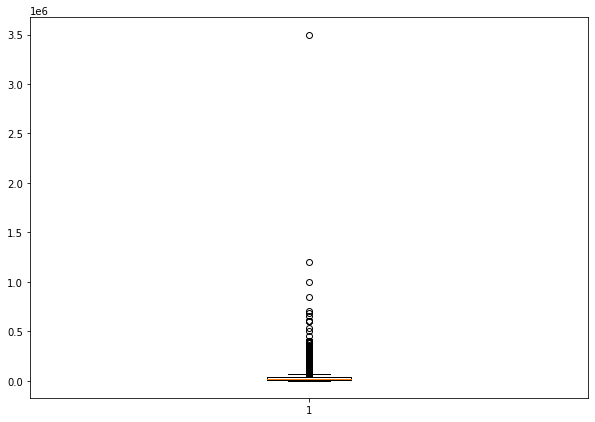

In [ ]:
plt.figure(figsize=(10,7))
plt.boxplot(simple_data['Rent'])
plt.show()

In [24]:
simple_data['Rent'].describe()

count       4,746.000
mean       34,993.451
std        78,106.413
min         1,200.000
25%        10,000.000
50%        16,000.000
75%        33,000.000
max     3,500,000.000
Name: Rent, dtype: float64

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
dictionaryRF=dict({
    'n_estimators':range(5,100,5),
    'max_depth':range(3,15)
})
modelRF=RandomForestRegressor()
searchRF=GridSearchCV(modelRF,dictionaryRF,cv=5)
searchRF.fit(x_train,y_train)
best_modelRF=searchRF.best_estimator_

In [91]:
best_modelRF

RandomForestRegressor(max_depth=10, n_estimators=10)

In [89]:
predRF=best_modelRF.predict(x_train)
r2_score(y_train, predRF)

0.8288090083373499

In [90]:
predRF2=best_modelRF.predict(x_test)
r2_score(y_test, predRF2)

0.6017109412809201

In [92]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
dictionary=dict({
    'n_estimators':range(5,300,5),
    'max_depth':range(2,15)
})

In [93]:
regGB=GradientBoostingRegressor(learning_rate=0.03)
search=GridSearchCV(regGB,dictionary,cv=5)
search.fit(x_train,y_train)
best_model=search.best_estimator_

In [94]:
best_model

GradientBoostingRegressor(learning_rate=0.03, max_depth=7, n_estimators=80)

In [95]:
predGB=best_model.predict(x_train)
r2_score(y_train, predGB)

0.9518855584567255

In [96]:
predGB2=best_model.predict(x_test)
r2_score(y_test, predGB2)

0.5912513920276288